In [1]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

# 데이터셋 등록
register_coco_instances("dataset_val", {}, "/home/elicer/new_val/shuffled_labels_yolo_coco_bb.json", "/home/elicer/new_val/shuffled_images")


In [2]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))

# 필요한 부분을 사용자의 환경에 맞게 업데이트
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # 예측 임계값 설정
cfg.MODEL.WEIGHTS = "/home/elicer/detectron2_custom_dataset/output_yolo2/segmentation/model_final.pth"  # 학습된 모델 경로 설정
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 모델이 예측하는 클래스 수로 설정
cfg.DATASETS.TEST = ("my_dataset_val", )  # 평가할 데이터셋 이름 설정

# 모델 로드
predictor = DefaultPredictor(cfg)

Filtered out 70 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


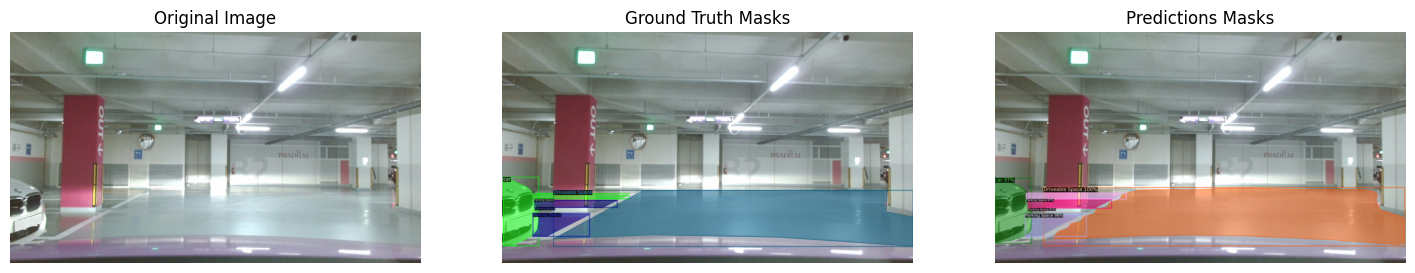

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import random

def visualize_predictions(dataset_dict, predictor):
    # 이미지 로드
    image_path = dataset_dict["file_name"]
    image = cv2.imread(image_path)
    
    # 예측 수행
    outputs = predictor(image)

    # Ground Truth 시각화
    metadata = MetadataCatalog.get("dataset_val")
    visualizer = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
    vis_gt = visualizer.draw_dataset_dict(dataset_dict)

    # 예측 시각화
    v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    # 결과 표시
    plt.figure(figsize=(18, 12))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image[:, :, ::-1])
    plt.title('Original Image')
    plt.axis('off')

    # Ground Truth Masks
    plt.subplot(1, 3, 2)
    plt.imshow(vis_gt.get_image())
    plt.title('Ground Truth Masks')
    plt.axis('off')

    # Predictions Masks
    plt.subplot(1, 3, 3)
    plt.imshow(out.get_image())
    plt.title('Predictions Masks')
    plt.axis('off')

    plt.show()

# 랜덤 이미지 선택 및 시각화
dataset_dicts = DatasetCatalog.get("dataset_val")
random_image = random.choice(dataset_dicts)
visualize_predictions(random_image, predictor)
